# **Clustering Charte Internet**

Nous allons étudier les diffèrentes colonnes qui traitent sur les informations de la charte mise en place et de la bonne utilisation du numérique et d'Internet. Il est important d'étudier cet aspect car même si une école met en place un grand nombre de moyens pour le numérique, si elle ne sensibilise pas et ne forme pas les élèves et leurs parents, un mauvais usage peut être fait de ces moyens et ils ne seront pas utilisés efficacement pour atteindre les résultats souhaités

- *`'AccesParentCharte'`* : est-ce que l'école met en place une action à destination des parents autour de l’internet responsable ou de l’usage responsable du numérique ?
- *``'ControlePosteriori'``* : est-ce que l'école utilise un dispositif d’enregistrement des sites visités permettant un contrôle a posteriori ?
- *``'SiCharteUsageWeb'``* : est-ce que l'école dispose d'une charte de bon usage d'Internet ?
- *``'DiffCh_AnnexeeRi'``* : La charte de bon usage de l’Internet est diffusée par annexe au règlement intérieur
- *``'DiffCh_DossierRentreeEnseignants'``* : La charte de bon usage de l’Internet est diffusée via le dossier de rentrée des enseignants
- *``'DiffCh_CRConseilAdmin'``* : La charte de bon usage de l’Internet est diffusée dans le compte‐rendu du conseil d'école
- *``'DiffCh_DiffusionParents'``* : La charte de bon usage de l’Internet est diffusée aux parents
- *``'DiffCh_autres'``* : La charte de bon usage de l’Internet est diffusée par un autre moyen
- *``'AccesParentCharte'``* : Votre école met‐elle en place une action à destination des parents autour de l’internet responsable ou de l’usage responsable du numérique ?

Nous allons procéder comme on a pu le faire dans les étapes précédentes.

In [2]:
import pandas as pd
import prince as pc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly_express as px
import plotly.graph_objects as go
import re

# import image module
from IPython.display import Image
import kaleido
import io
from PIL import Image as ImagePIL

In [3]:
df = pd.read_csv('../data/lycee-college/fr-en-etic_2d.csv', sep=';')

#On consulte les colonnes existantes
df.columns

#on garde les données les plus récentes, donc 2019
df = df.loc[df["Millesime"] == 2019]

In [4]:
df.set_index('Code_UAI', inplace=True)

df_charte = df.drop(columns=[
       'Millesime', 'Code_nature', 'nature_uai', 'typ_etab',
       'Academie', 'Departement', 'NbEleve', 'NbEnseignant',
       'SiEtabCentreRessource', 'SiProjetNumEcole', 'SiEntDisponible',
       'SiProjEtabIntegreENT', 'Maint_PersCollect', 'Maint_PrestaExt',
       'Maint_PersonnelEducNatHsEtab', 'Maint_PersonnelEtab',
       'Maint_AutreNeSaitPas', 'Maint_Personne', 'NbRessourceEdit',
       'TpRess_ManuelNum', 'TpRess_AnimScienLogiSimu', 'TpRess_Bdd',
       'TpRess_LogiOutils', 'TpRess_OuvRef', 'TpRess_ResEntrainement',
       'TpRess_Autres', 'TpRess_aucune', 'ServInt_NoteElev', 'ServInt_AbsElev',
       'ServInt_EdtElevCls', 'ServInt_CahierTxt', 'ServInt_DocRessPeda',
       'ServInt_AgdActuEtab', 'ServInt_PlatApp', 'ServInt_Autres',
       'ServInt_aucun', 'NbTerminaux', 'NbTablette', 'NbTablettePC',
       'NbMicroMoins5', 'NbMicroPortable', 'NbPortAffEl', 'NbPortAffEns',
       'NbEleveEqASH', 'NbPosteEqASH', 'NbTBI', 'propClassesAvecTBI',
       'NbVideoProj', 'NbClassMobile', 'NbLecteurMpx', 'NbImpr3D',
       'AccWeb_RTC', 'AccWeb_CableFibreOptique', 'AccWeb_ADSL',
       'AccWeb_AutresHautDebit', 'AccWeb_NeSaitPas', 'AccWeb_Aucun',
       'DebitWeb', 'SiWifi', 'SalleInternet', 'PostesInfoElvHorsCours',
       'SiPareFeuEtab', 'SiOuifiltrageWeb',
       'ElvAuthentif', 'SiVisioConferenc', 'SiEntUtilise',
       'TypeMatHandi_Tablette', 'TypeMatHandi_OrdiPort', 'TypeMatHandi_LogApp',
       'TypeMatHandi_Autre', 'Code_region', 'Libelle_region'
])


df_charte.dropna(inplace=True)

In [5]:
df_charte.columns = df_charte.columns.str.lower()

In [6]:
df_charte.columns

Index(['controleposteriori', 'sicharteusageweb', 'diffch_annexeeri',
       'diffch_dossierrentreeenseignants', 'diffch_crconseiladmin',
       'diffch_diffusionparents', 'diffch_autres', 'accesparentcharte'],
      dtype='object')

On vérifie que les modifications sont bien appliquées

In [7]:
df_charte.head()

,controleposteriori,sicharteusageweb,diffch_annexeeri,diffch_dossierrentreeenseignants,diffch_crconseiladmin,diffch_diffusionparents,diffch_autres,accesparentcharte
Code_UAI,,,,,,,,
0810016C,oui,oui,oui,non,non,non,non,non
0810026N,oui,oui,oui,non,non,oui,non,ouiEntiteExt
0810041E,oui,oui,oui,non,non,oui,non,ouiPersonnelEtb
0810124V,oui,oui,oui,non,non,non,non,ouiPersonnelEtb
0810125W,oui,oui,oui,non,non,non,non,non


On va ensuite procéder à la transformation de ces modalités en valeur binaire. On va associer à la modalité "oui" la valeur 1 et à la modalité "non" la valeur 0. Pour la colonne `accesParentCharte`, nous voyons que nous avons plusieurs modalités, on va voir combien il en existe et on va associer à chaque modalité une valeur numérique.

In [8]:
df_charte.accesparentcharte.value_counts()

non                187
ouiPersonnelEtb    110
ouiEntiteExt       100
Name: accesparentcharte, dtype: int64

On voit qu'il existe 3 modalités, soit "non" l'école ne met pas en place une action de sensibilisation pour les parents sur l'internet responsable et l'usage responsable du numérique.

Les deux autres modalités sont "ouiPersonnelEtb" et "ouiEntiteExt", elles sont presque semblables car cela veut dire qu'une action est mise en place, ce qui change est la personne qui s'occupe de la sensibilisation. 

Si la personne qui s'occupe de ça est compétente dans la matière, cela ne change rien que cela soit fait par le personnel de l'établissement ou par une personne extérieure. 
Le plus important est qu'une action de sensibilisation existe. Nous allons donc agréger ces deux modalités en une seule qui sera "oui"

In [9]:
df_charte.replace({ 'ouiPersonnelEtb': 'oui', 'ouiEntiteExt': 'oui'}, inplace=True)

df_charte.accesparentcharte.value_counts()

oui    210
non    187
Name: accesparentcharte, dtype: int64

On peut maintenant transformer toutes les colonnes en valeurs binaires

In [10]:
for col in df_charte.columns:
    df_charte[col] = df_charte[col].replace({'oui': 1, 'non': 0})
    df_charte[col] = df_charte[col].astype(float)

df_charte.head()

,controleposteriori,sicharteusageweb,diffch_annexeeri,diffch_dossierrentreeenseignants,diffch_crconseiladmin,diffch_diffusionparents,diffch_autres,accesparentcharte
Code_UAI,,,,,,,,
0810016C,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
0810026N,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
0810041E,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
0810124V,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
0810125W,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### *Corrélation entre les variables*

Nous allons voir si il existe une corrélation entre les différentes colonnes.

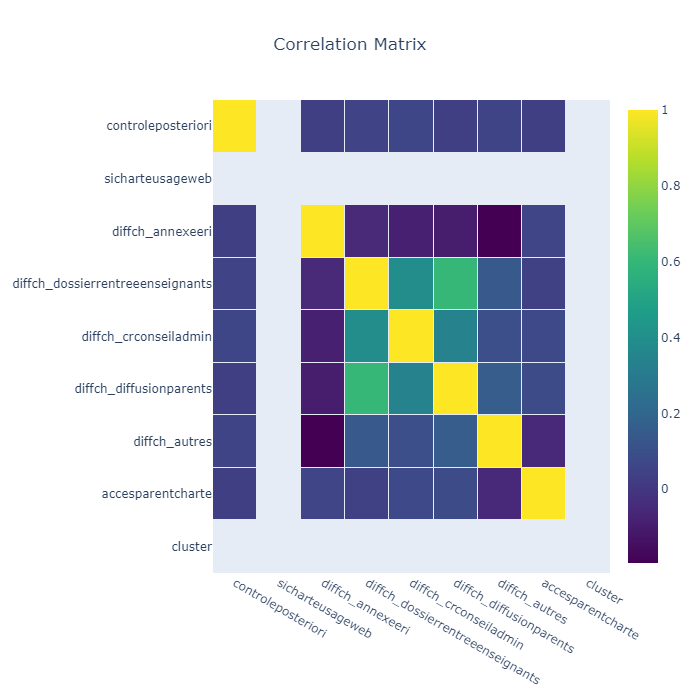

In [22]:
column_names = df_charte.columns

heat = go.Heatmap(
    z=df_charte.corr().values,
    x=column_names,
    y=column_names,
    xgap=1, ygap=1,
    colorscale='Viridis'
)

layout = go.Layout(
    title='Correlation Matrix',
    title_x=0.5,
    width=700, height=600,
    xaxis_showgrid=False, yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig = go.Figure(data=[heat], layout=layout)
Image(fig.to_image(format="png", engine="kaleido", width=700, height=700))
#fig.show()

On peut remarquer que pour la corrélation entre `sicharteusageweb` et les autres variables on a un `NaN`. On va essayer de voir pour quelle raison on a ce résultat. On va voir le nombre de valeurs possibles pour la variable `sicharteusageweb`.

In [12]:
df_charte.sicharteusageweb.value_counts()

1.0    397
Name: sicharteusageweb, dtype: int64

On voit qu'il existe seulement une seule valeur possible pour cette variable, ce qui explique le résultat de la matrice de corrélation. Il faudrait exclure cette variable de notre étude.


Maintenant qu'on a trouvé la source du problème, nous pouvons passer à l'interprétation de la matrice de corrélation :

On voit qu'il n'existe pas de corrélation considérable entre nos variables. Une seule attire notre attention, celle entre `diffch_dossierrentreeenseignants` et `diffch_diffusionparents` qui vaut 0.6. On ne peut pas réellement tiré de conclusion.

On va donc passer au clustering pour remarquer des groupes qui se ressemblent.

### *Classification non supervisée*

Nous utiliserons ici comme dans les autres études l'algorithme de `KMeans` pour classifier les différents établissements. Tous les essais avec les différents paramètres n'apparaîtront pas. Seulement les résultats que nosu jugerons les plus importants apparaitront dans la suite.

In [13]:
km_charte = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    max_iter=300,
    random_state=0
)

y_km_charte = km_charte.fit_predict(df_charte.drop(columns=['sicharteusageweb']))

resultat = pd.DataFrame(km_charte.cluster_centers_, columns=[km_charte.feature_names_in_])

resultat

,controleposteriori,diffch_annexeeri,diffch_dossierrentreeenseignants,diffch_crconseiladmin,diffch_diffusionparents,diffch_autres,accesparentcharte
0,0.862903,0.983871,-2.775558e-16,0.040323,3.330669e-16,0.080645,1.000000e+00
1,0.870968,0.919355,8.548387e-01,0.225806,7.258065e-01,0.258065,2.220446e-16
2,0.918605,0.976744,7.790698e-01,0.255814,7.674419e-01,0.093023,1.000000e+00
3,0.864000,0.984000,-3.330669e-16,0.016000,1.665335e-16,0.056000,7.771561e-16


Nous avons au dessus les moyennes des centres qui vont nous être utiles pour expliquer les caractèristiques de chaque classe et accorder à chaque établissement une note (modalité) pour ce qui concerne des actions mises en place pour un bon usage du numérique et d'internet.

Nous allons convertir cela en "oui" et "non" pour pouvoir interprèter plus facilement ces résultats.

In [14]:
def round(row):
    if(row > 0.5):
        return 1
    else:
        return 0


for col in resultat.columns:
    resultat[col] = resultat[col].apply(round)
    resultat[col] = resultat[col].replace({0: 'non', 1: 'oui'})
    

resultat

,controleposteriori,diffch_annexeeri,diffch_dossierrentreeenseignants,diffch_crconseiladmin,diffch_diffusionparents,diffch_autres,accesparentcharte
0,oui,oui,non,non,non,non,oui
1,oui,oui,oui,non,oui,non,non
2,oui,oui,oui,non,oui,non,oui
3,oui,oui,non,non,non,non,non


En interprétant les résultats, voici les modalités qui ressortent et à quelles classes elles vont être attribuées.

- "Très bien" : classe 2  (On a presque "oui" partout, c'est le meilleur résultat entre toutes les classes)
- "Bien" : classe 1
- "Moyen" : classe 0   (nous accordons moyen à la classe 0 car en moyenne tous les établissements appartenant à ce cluster font un contrôle à posteriori permettant de savoir les sites visités et donc remarquer rapidement si un mauvais usage est fait ou pas)
- "Mauvais" : classe 3

Nous pouvons maintenant affecter à chaque établissement son cluster pour pouvoir avoir une visualisation des données à l'aide d'une ACP et pouvoir par la même occasion si une bonne découpe des classes a été faite.

In [15]:
df_charte['cluster'] = y_km_charte
df_charte['cluster'] = df_charte['cluster'].astype(str)

On va d'abord centrer et réduire les données pour avoir une bonne représentation.

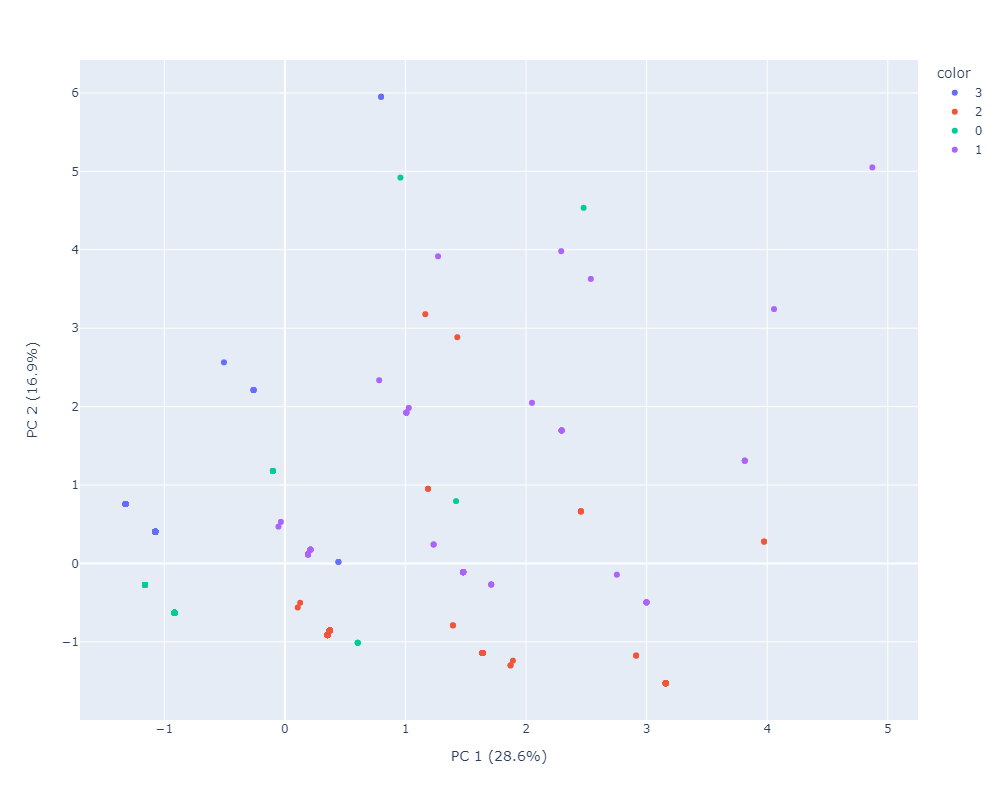

In [25]:
df_scaled = StandardScaler().fit_transform(df_charte.drop(columns=['sicharteusageweb', 'cluster']))

pca_charte = PCA(n_components=2)
components = pca_charte.fit_transform(df_scaled)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_charte.explained_variance_ratio_ * 100)
}

fig = px.scatter(components, x=0, y=1, color=df_charte.cluster, labels=labels)
Image(fig.to_image(format="png", engine="kaleido", width=1000, height=800))

#fig.show()


Cette ACP restitue 45.4 % de la variance totale. Ceci est bas, il est donc difficile d'interprèter cette ACP.

La découpe n'est pas très bonne à ce qu'on peut voir, il n'y a pas réellement de groupes d'individus ou d'établissements atypiques. Cependant on ne peut pas juger cette découpe car la variance totale expliquée est inférieure à 67%.

On va essayer de passer en 3 dimensions car peut-être quon récupérera plus d'informations.

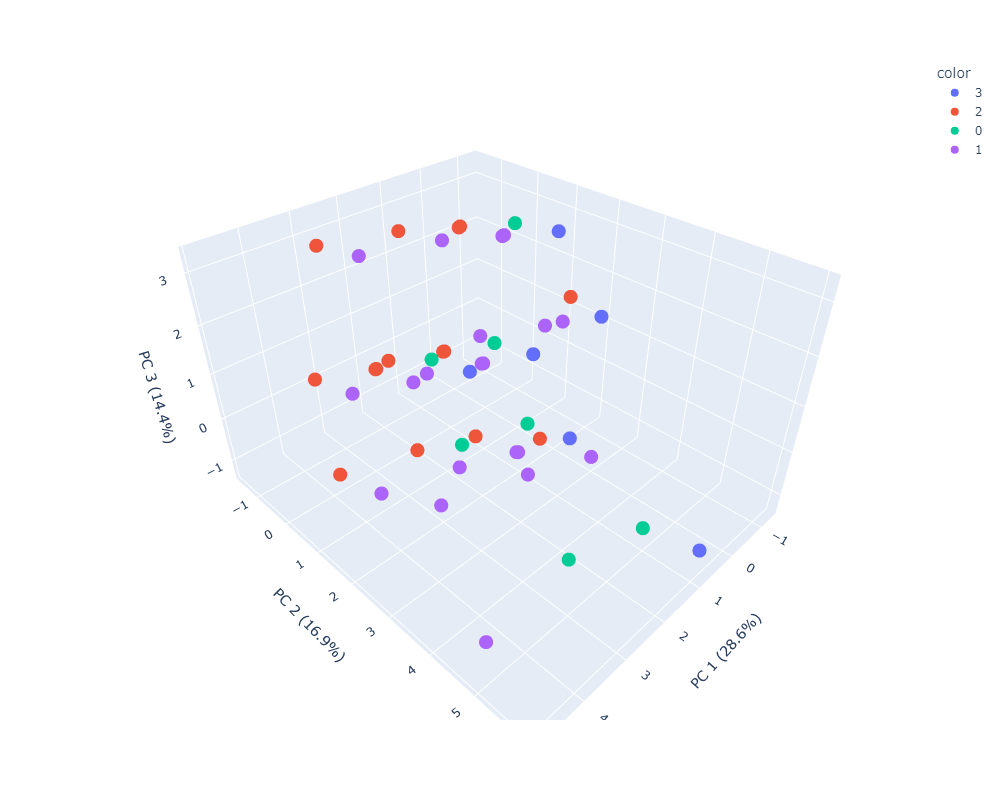

In [26]:
pca_3d = PCA(n_components=3)

components_3d = pca_3d.fit_transform(df_scaled)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_3d.explained_variance_ratio_ * 100)
}

fig = px.scatter_3d(components_3d, x=0, y=1, z=2, color=df_charte.cluster, labels=labels)

Image(fig.to_image(format="png", engine="kaleido", width=1000, height=800))
#fig.show()

On a déjà une meilleure variance totale expliquée, elle est montée à 59.7%. On peut déjà voir ici une meilleure découpe même si il est très compliqué d'interpréter un graphe en 3 dimensions car ils ne sont pas toujours fiables.

On peut maintenant passer à l'enregistrement de notre résultat.


### *Enregistrement du résultat*

Nous allons créé seulement la colonne qui nous intéresse ici pour ensuite la réutiliser dans l'analyse finale.

In [18]:
df_charte_final = pd.DataFrame(df_charte.cluster)
df_charte_final.rename(columns={'cluster': 'charte_num'}, inplace=True)

df_charte_final.charte_num.replace({'0': 'Moyen', '1': 'Bien', '2': 'Très bien', '3': 'Mauvais'}, inplace=True)

df_charte_final.charte_num.value_counts()

Mauvais      125
Moyen        124
Très bien     86
Bien          62
Name: charte_num, dtype: int64

In [19]:
df_charte_final.to_csv('../data/analyses/charte_num.csv', index=True, sep=';')